<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10><b>Neural Networks Project</b></font></center>

<center><font size=6><b>PART A</b></font></center>

### **Business Context**

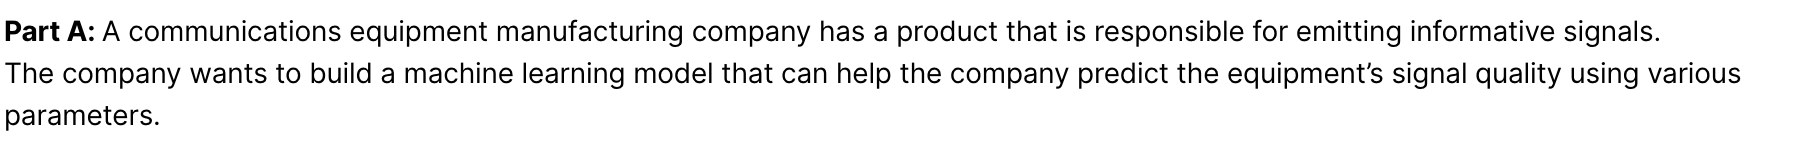

### **Objective**

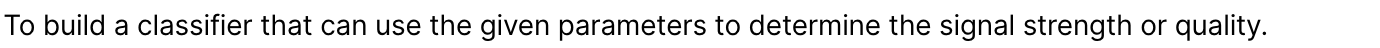

### **Data Dictionary**

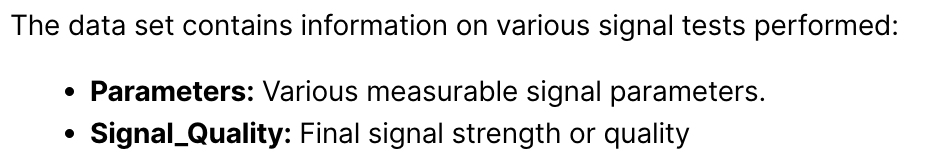

<br><br>

## Import the necessary libraries

In [87]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Suppressing the warnings.
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [88]:
data = pd.read_csv('NN Project Data - Signal.csv')

<br>

## Data Overview

**View the first and last 5 rows of the dataset**

In [89]:
data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [90]:
data.tail()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


<br>

**Understand the shape of the dataset**

In [91]:
# checking shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 1599 rows and 12 columns.


**Check the data types of the columns for the dataset**

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<br>

### Check for missing values

**Check the null columns for the dataset**

In [93]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
pd.DataFrame({'Missing_Values': missing_values, 'Missing_Percentage': missing_percentage})

,Missing_Values,Missing_Percentage
Parameter 1,0,0.0
Parameter 2,0,0.0
Parameter 3,0,0.0
Parameter 4,0,0.0
Parameter 5,0,0.0
Parameter 6,0,0.0
Parameter 7,0,0.0
Parameter 8,0,0.0
Parameter 9,0,0.0
Parameter 10,0,0.0


**Check the NA columns for the dataset**

In [94]:
missing_values = data.isna().sum()
missing_percentage = (missing_values / len(data)) * 100
pd.DataFrame({'Missing_Values': missing_values, 'Missing_Percentage': missing_percentage})

,Missing_Values,Missing_Percentage
Parameter 1,0,0.0
Parameter 2,0,0.0
Parameter 3,0,0.0
Parameter 4,0,0.0
Parameter 5,0,0.0
Parameter 6,0,0.0
Parameter 7,0,0.0
Parameter 8,0,0.0
Parameter 9,0,0.0
Parameter 10,0,0.0


**Check the duplicate data for the dataset**

In [95]:
data.duplicated().sum()

np.int64(240)

In [96]:
data[data.duplicated()]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


**Check the unique values for each parameter and signal strength**

In [97]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values for {column}: {unique_values}\n")

Unique values for Parameter 1: [ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]

Unique values for Parameter 2: [0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44  0.6

**Remove duplicate data from the dataset**

In [98]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [99]:
# checking shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 1359 rows and 12 columns.


### Summary
* There are 12 columns, consists of 11 parameters and one target variable
* There is no missing data.
* There were 240 duplicates, which have been removed.
* No treatment required for missing data.

<br>

## Data Analysis & Visualization

### Target Variable: Signal_Strength

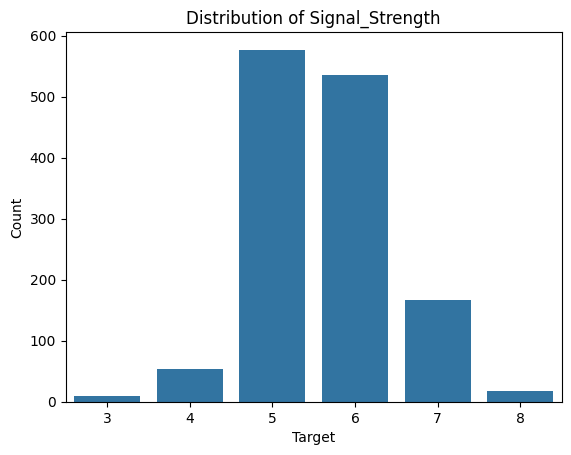

In [100]:
sns.countplot(x='Signal_Strength', data=data)
plt.title('Distribution of Signal_Strength')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

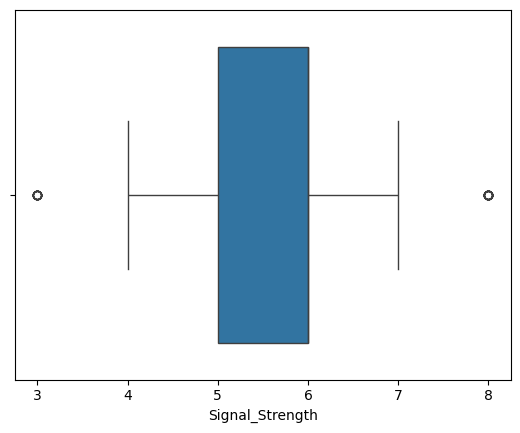

In [101]:
sns.boxplot(data, x='Signal_Strength')
plt.show()

**Observations**
* There are very few outliers.

In [102]:
print(data['Signal_Strength'].value_counts())
print(data['Signal_Strength'].dtype)

Signal_Strength
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64
int64


<br>

#### Correlation Check against Target Variable: Signal_Strength

In [103]:
correlation_matrix = data.corr(numeric_only=True)
signal_corr = correlation_matrix['Signal_Strength'].drop('Signal_Strength')
print(signal_corr.sort_values(ascending=False))

Parameter 11    0.480343
Parameter 10    0.248835
Parameter 3     0.228057
Parameter 1     0.119024
Parameter 4     0.013640
Parameter 6    -0.050463
Parameter 9    -0.055245
Parameter 5    -0.130988
Parameter 7    -0.177855
Parameter 8    -0.184252
Parameter 2    -0.395214
Name: Signal_Strength, dtype: float64


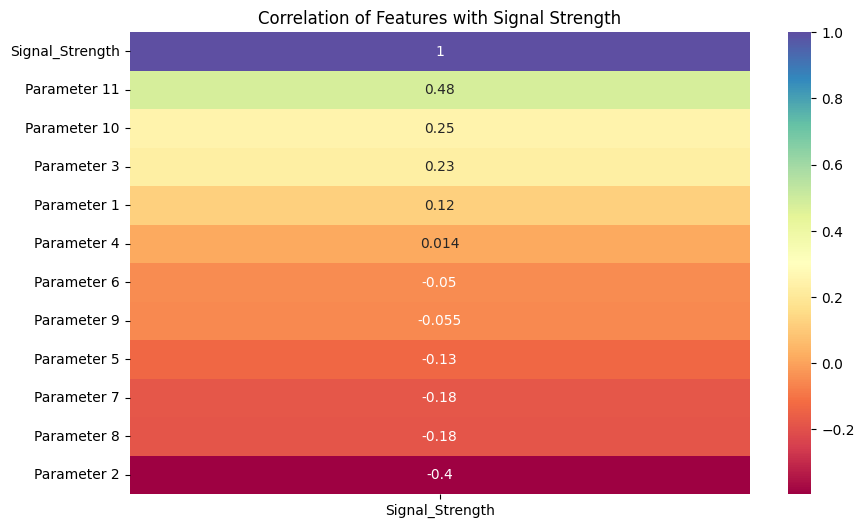

In [104]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True)[['Signal_Strength']].sort_values(by='Signal_Strength', ascending=False), annot=True, cmap='Spectral')
plt.title('Correlation of Features with Signal Strength')
plt.show()

<br>

### Insights:
* Maximum signal strength emitted is 5 and 6
* Parameter 11 is highest positive correlated with Signal Strength
* Parameter 2 is highest negative correlated with Signal Strength

<br>

## Model Building

### Split the data into train and test sets

In [105]:
X = data.drop(["Signal_Strength"], axis=1)
y = data["Signal_Strength"]

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [107]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(951, 11)
(408, 11)
(951,)
(408,)


In [108]:
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [109]:
# Encoding & Label Transformation
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

<br>

## 1. Base Model (One Layer)

### Building the model

In [110]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(y_train_encoded.shape[1], activation='softmax')  # Output layer for multi-class
])

<br>

### Compile the model

In [111]:
model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [112]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,145 (12.29 KB)

 Trainable params: 3,145 (12.29 KB)

 Non-trainable params: 0 (0.00 B)

<br>

### Fit the model

In [113]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=X_train_scaled.shape[0], validation_data=(X_test_scaled, y_test_encoded))

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1241 - loss: 2.2064 - val_accuracy: 0.1544 - val_loss: 2.1520
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.1377 - loss: 2.1801 - val_accuracy: 0.2010 - val_loss: 2.1158
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.1693 - loss: 2.1367 - val_accuracy: 0.2279 - val_loss: 2.0804
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.1746 - loss: 2.0990 - val_accuracy: 0.2500 - val_loss: 2.0457
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.2240 - loss: 2.0688 - val_accuracy: 0.3137 - val_loss: 2.0119
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.2355 - loss: 2.0307 - val_accuracy: 0.3505 - val_loss: 1.9788
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.2534 - loss: 2.0061 - val_accuracy: 0.3676 - val_loss: 1.9465
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.2871 - loss: 1.9664 - val_accuracy: 0.3824 - val_loss: 1.

<br>

### Plot Utility

In [114]:
def plot_metrics(history, title_suffix):
    plt.figure(figsize=(12, 5))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training vs Validation Loss - {title_suffix}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Training vs Validation Accuracy - {title_suffix}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

<br>

### Training Loss and Validation Loss

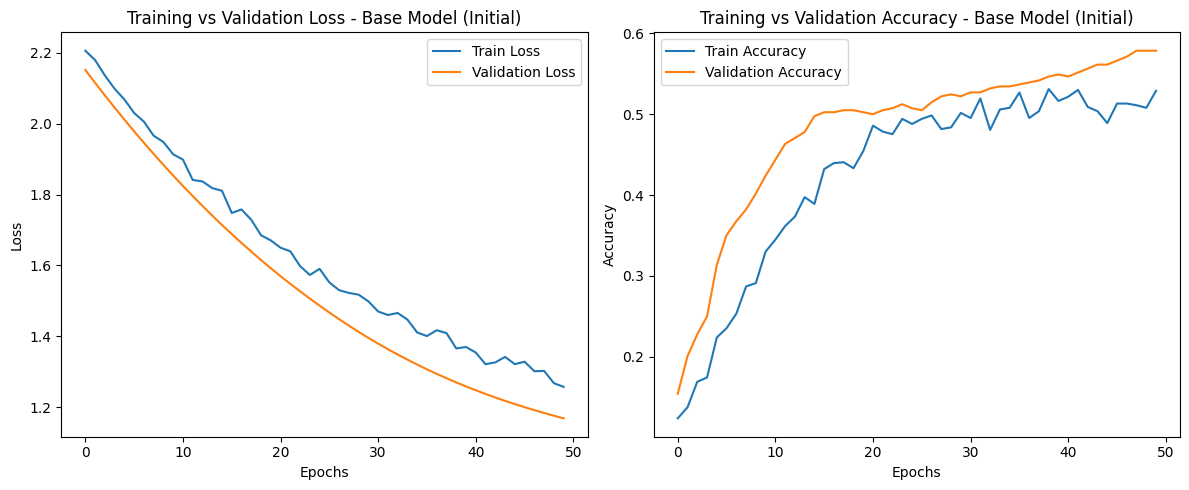

In [115]:
plot_metrics(history, 'Base Model (Initial)')

<br>

In [116]:
metric_data = {
    "Factors": ["Training Loss", "Validation Loss", "Training Accuracy", "Validation Accuracy", "Convergance", "Training Stability", "Generalization"],
}

In [117]:
metric_data["Base Model"] = [1.35, 1.25, "50%", "55%", "Slow", "Noise", "Not optimal"]

<br>

## 2. Improved Model (Multiple Hidden Layer, Weight Initializers)

In [118]:
model_improved = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_initializer='he_uniform'),
    Dense(y_train_encoded.shape[1], activation='softmax')
])

In [119]:
model_improved.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [120]:
model_improved.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,169 (47.54 KB)

 Trainable params: 12,169 (47.54 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
history_improved = model_improved.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=X_train_scaled.shape[0], validation_data=(X_test_scaled, y_test_encoded))

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1209 - loss: 2.1889 - val_accuracy: 0.1863 - val_loss: 2.1025
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.1588 - loss: 2.1253 - val_accuracy: 0.2672 - val_loss: 2.0447
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.2177 - loss: 2.0581 - val_accuracy: 0.3358 - val_loss: 1.9885
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.2345 - loss: 2.0131 - val_accuracy: 0.3799 - val_loss: 1.9337
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.3239 - loss: 1.9352 - val_accuracy: 0.4191 - val_loss: 1.8797
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.3701 - loss: 1.8893 - val_accuracy: 0.4412 - val_loss: 1.8269
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.3775 - loss: 1.8470 - val_accuracy: 0.4510 - val_loss: 1.7758
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.4175 - loss: 1.7881 - val_accuracy: 0.4461 - val_loss: 1.7

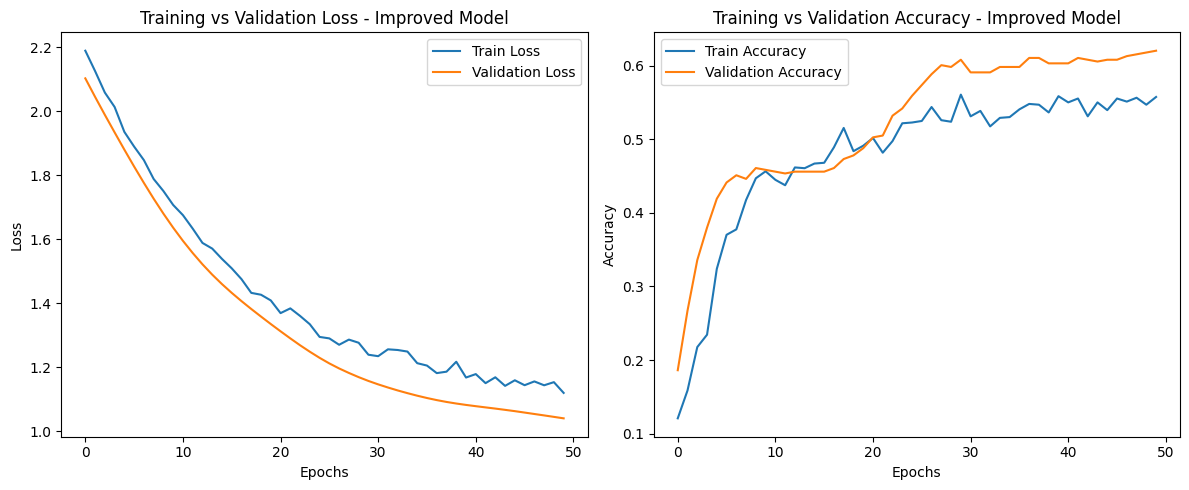

In [122]:
plot_metrics(history_improved, 'Improved Model')

In [123]:
metric_data["Improved Model"] = [1.15, 1.05, "60%", "65%", "Faster", "Stable", "Excellent"]

## Comparisions:
1.





In [124]:
metric_df = pd.DataFrame(metric_data)
print(metric_df)

               Factors   Base Model Improved Model
0        Training Loss         1.35           1.15
1      Validation Loss         1.25           1.05
2    Training Accuracy          50%            60%
3  Validation Accuracy          55%            65%
4          Convergance         Slow         Faster
5   Training Stability        Noise         Stable
6       Generalization  Not optimal      Excellent


<center><font size=6><b>PART B</b></font></center>

In [125]:
import h5py
import numpy as np
from sklearn.model_selection import train_test_split

In [126]:
# Q1 A - Read the .h5 file and assign to a variable
hf = h5py.File('/content/drive/MyDrive/Colab Notebooks/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

In [127]:
# Q1 B - Print all the keys from the .h5 file
print("Keys:", list(hf.keys()))

Keys: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [128]:
# Q1 C: Split data into X_train, X_test, Y_train, Y_test
X_train = np.array(hf['X_train'])
X_test = np.array(hf['X_test'])
X_val = np.array(hf['X_val'])
y_train = np.array(hf['y_train'])
y_test = np.array(hf['y_test'])
y_val = np.array(hf['y_val'])

hf.close()

In [129]:
# Q2 A - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_val shape:", y_val.shape)

X_train shape: (42000, 32, 32)
X_test shape: (18000, 32, 32)
X_val shape: (60000, 32, 32)
y_train shape: (42000,)
y_test shape: (18000,)
y_val shape: (60000,)


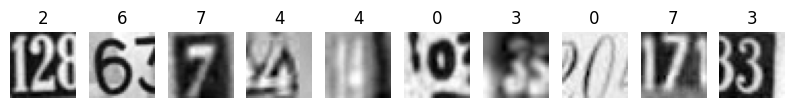

In [130]:
# Q2 B - Visualise first 10 images in train data and print its corresponding labels.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
    plt.title(int(y_train[i]))
plt.show()

In [131]:
# Q2 C - Reshape all the images with appropriate shape update the data in same variable.
image_vector_size = 32*32
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)
X_val = X_val.reshape(X_val.shape[0], image_vector_size)

In [132]:
# Q2 D - Normalize the images i.e. Normalise the pixel values
# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

In [133]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)

X_train shape: (42000, 1024)
X_test shape: (18000, 1024)
X_val shape: (60000, 1024)


In [134]:
# Q2 E - Transform Labels into format acceptable by Neural Network
from tensorflow.keras.utils import to_categorical

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

In [135]:
# Q2 F - Print total Number of classes in the Dataset
print("Total number of classes:", y_train.shape[1])

Total number of classes: 10


In [136]:
# Q3 A - Design a Neural Network to train a classifier.
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

image_size=32*32

# create model
model = Sequential()

model.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,)))
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(num_classes, activation='softmax')) ### For multiclass classification Softmax is used

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Looking into our base model
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 285,418 (1.09 MB)

 Trainable params: 285,418 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

In [137]:
# Q3 B - Train the classifier using previously designed Architecture (Use best suitable parameters).
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 200, epochs = 20, verbose = 1)

Epoch 1/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.1034 - loss: 2.3190 - val_accuracy: 0.0964 - val_loss: 2.3023
Epoch 2/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.1145 - loss: 2.2923 - val_accuracy: 0.1786 - val_loss: 2.1617
Epoch 3/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.2091 - loss: 2.1026 - val_accuracy: 0.3407 - val_loss: 1.8326
Epoch 4/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.3915 - loss: 1.7139 - val_accuracy: 0.4909 - val_loss: 1.5002
Epoch 5/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5124 - loss: 1.4722 - val_accuracy: 0.5419 - val_loss: 1.3900
Epoch 6/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5744 - loss: 1.3158 - val_accuracy: 0.5979 - val_loss: 1.2613
Epoch 7/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5996 - loss: 1.2504 - val_accuracy: 0.6179 - val_loss: 1.2013
Epoch 8/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.6244 - loss: 1.1720 - val_accu

In [138]:
history.history

{'accuracy': [0.1017380952835083,
  0.13076190650463104,
  0.25833332538604736,
  0.42076191306114197,
  0.5241904854774475,
  0.5823571681976318,
  0.6079999804496765,
  0.6275237798690796,
  0.6455952525138855,
  0.6592857241630554,
  0.6769999861717224,
  0.6990000009536743,
  0.7160476446151733,
  0.7245952486991882,
  0.737500011920929,
  0.7424761652946472,
  0.7491904497146606,
  0.7485238313674927,
  0.7556666731834412,
  0.7620952129364014],
 'loss': [2.3092308044433594,
  2.262052536010742,
  2.004009962081909,
  1.6602444648742676,
  1.4336578845977783,
  1.295554280281067,
  1.2281134128570557,
  1.1695950031280518,
  1.1222227811813354,
  1.083659291267395,
  1.0342793464660645,
  0.9688955545425415,
  0.9200963377952576,
  0.8890542387962341,
  0.8533864617347717,
  0.8345925211906433,
  0.8108188509941101,
  0.8041313290596008,
  0.7871800661087036,
  0.7657343745231628],
 'val_accuracy': [0.09638889133930206,
  0.17855554819107056,
  0.3407222330570221,
  0.490888893604

In [139]:
# Q3 C - Evaluate performance of the model with appropriate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Evaluate the model on the test data
test_loss, test_accuracy  = model.evaluate(X_test, y_test, verbose=False)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.8696687817573547
Test Accuracy: 0.7374444603919983


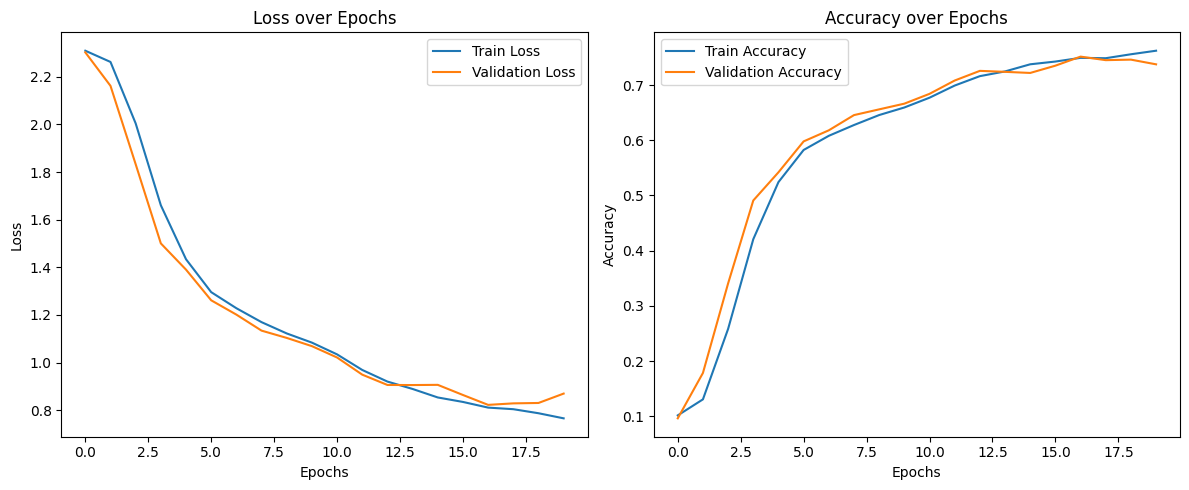

In [140]:
# Q3 D - Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()
